In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def calculate_prior(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    prior = class_counts / len(y)
    return prior


In [3]:
def calculate_likelihood(x, feature_values, class_labels):
    num_features = len(feature_values)
    likelihood = np.ones((len(class_labels), num_features))
    for i, label in enumerate(class_labels):
        for j in range(num_features):
            feature = x[:, j]
            likelihood[i, j] = np.sum(feature == feature_values[j]) / len(feature)
    return likelihood

In [4]:
def calculate_posterior(x, prior, likelihood):
    posterior = prior * likelihood.prod(axis=1)
    return posterior


In [5]:
def naive_bayes(x_train, y_train, x_test):
    class_labels = np.unique(y_train)
    num_classes = len(class_labels)

    prior = calculate_prior(y_train)
    likelihood = calculate_likelihood(x_train, [0, 1], class_labels)

    posteriors = np.zeros((len(x_test), num_classes))
    for i, x in enumerate(x_test):
        posterior = calculate_posterior(x, prior, likelihood)
        posteriors[i] = posterior

    y_pred = class_labels[np.argmax(posteriors, axis=1)]
    return y_pred

In [12]:
# Load data from CSV file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess data
x_train = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).values
y_train = train_data['Survived'].values
x_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).values


In [7]:
# Handle missing values
x_train = np.nan_to_num(x_train, nan=-1)
x_test = np.nan_to_num(x_test, nan=-1)


In [8]:
# Apply Naive Bayes algorithm
y_pred = naive_bayes(x_train, y_train, x_test)


In [9]:
# Print the predicted labels
print("Predicted labels:", y_pred)


Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


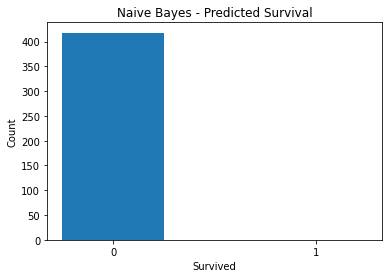

In [10]:
# Plot the predicted labels
plt.hist(y_pred, bins=[0, 1, 2], align='left', rwidth=0.5)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Naive Bayes - Predicted Survival')
plt.show()

In [11]:
# Save predicted labels to a file
np.savetxt('predicted_labels.txt', y_pred, fmt='%d')

